## Notes:
To open on Google Colab\
https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/main/Course_Notes/Week2/assigment1.ipynb

# Assignment 1

NumPy tutorial on the Moore's Law, [tutorial](https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html).

**1. Load the data**
```python
    data_url = 'https://github.com/numpy/numpy-tutorials/raw/main/content/transistor_data.csv'
```
 * Load the data into a variable called ```data```
 * Print the name of the columns in the file
 * How many columns the file has?
 * What are the total number of data points?
 * What is the name of property in the 4th column?

In [76]:
# code here
# (tip) dont forget to import all important/relevant Python libraries 

import numpy as np
import pandas as pd
# D = pd.read_csv('../data/qm9.csv')

#load data
data_url = 'https://github.com/numpy/numpy-tutorials/raw/main/content/transistor_data.csv'
data = pd.read_csv(data_url)

# * Print the name of the columns in the file
columns_names = data.columns
print('Name of the columns: \n', columns_names)

# * How many columns the file has?
print('File has %s columns'%len(columns_names))

# * What are the total number of data points?
n_columns = data.shape[1]
n_rows = data.shape[0]
N = n_columns * n_rows
print('Total number of data points = %s'%(N))

# * What is the name of property in the 4th column?
print('Property in the 4th columns is %s'%(columns_names[3]))


Name of the columns: 
 Index(['Processor', 'MOS transistor count', 'Date of Introduction', 'Designer',
       'MOSprocess', 'Area'],
      dtype='object')
File has 6 columns
Total number of data points = 1074
Property in the 4th columns is Designer


**2. Basic data science**

* From ```data``` extract the second and third columns (or using the names 'MOS transistor count' and 'Date of Introduction')
  * Store the values of 'MOS transistor count' using a variable named ```transistor```
  * Store the values of 'Date of Introduction' using a variable named ```year```
* Compute the mean and standard deviation of the 'MOS transistor count'

In [77]:
#code here
transistor = data['MOS transistor count'].to_numpy()
year = data['Date of Introduction'].to_numpy()

# * Compute the mean and standard deviation of the 'MOS transistor count'
mean_transistor = np.mean(transistor)
std_transistor = np.std(transistor)

print('The mean and the std of the transistors are %.3f and %.3f'%(mean_transistor,std_transistor))


The mean and the std of the transistors are 2367212492.123 and 4742819076.515


**Extra (for the adventurous):**\
The column ```Designer``` contains the name of the manufacturers of the computer chips. 
1. What are the name of the *Designers* that are contained in the dataset? (tip: use pandas [```unique```](https://pandas.pydata.org/docs/reference/api/pandas.unique.html))
2. What is the manufacturer that appears the most times in the data and how many times?
3. Plot: manufacturer vs number of times it appears\
   (tip: use ```data[data['Designer'] == 'NAME-OF-THE-DESIGNER'].shape```)

The unique designers are:
['Intel' 'NEC' 'Motorola' 'Texas Instruments' 'MOS Technology' 'Intersil'
 'RCA' 'Zilog' 'Bell Labs' 'WDC' 'IBM' 'Acorn' 'Harris Corporation'
 'Fujitsu' 'Hitachi' 'DEC WRL' 'MIPS' 'ARM' 'DEC' 'Offete Enterprises'
 'Acorn/DEC/Apple' 'AMD' 'Sony/Toshiba' 'IBM/Nintendo' 'Sony/IBM/Toshiba'
 'Matsushita' 'Sun/Oracle' 'Apple' 'Microsoft/AMD' 'Oracle' 'Qualcomm'
 'Huawei' 'SiFive' 'Nvidia' 'Amazon']


the manufacturer that appears the most times is Intel
the manufacturer that appears the most times is Intel




/var/folders/t5/4s883lqs43gbc9km4ykw_y7w0000gn/T/ipykernel_30168/1822984388.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(values, rotation='vertical')


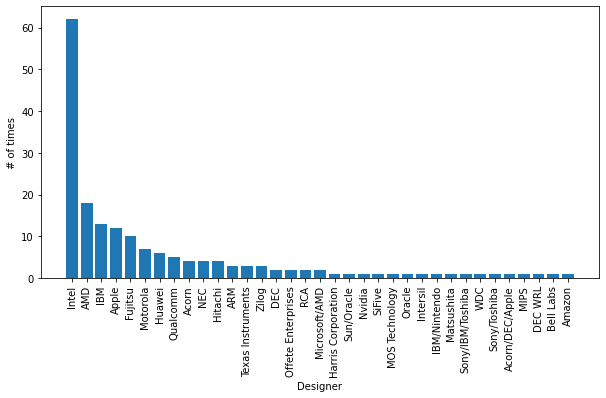

In [78]:
#code here
import matplotlib.pyplot as plt
designer = data['Designer']

# 1. What are the name of the * Designers * that are contained in the dataset? 
unique_designer = designer.unique()

print('The unique designers are:')
print(unique_designer)
print('\n')

# 2. What is the manufacturer that appears the most times in the data and how many times?
n_ = []
for d in unique_designer:
    n_d = data[data['Designer'] == d].shape[0]
    n_.append(n_d)
max_designer = unique_designer[np.argmax(np.array(n_))]
print('the manufacturer that appears the most times is %s'%(max_designer))

# smarter way
n_ = designer.value_counts()
values = designer.value_counts().keys().tolist()
counts = designer.value_counts().tolist()
# value count is sorted
print('the manufacturer that appears the most times is %s' % (values[0]))
print('\n')

# Plot: manufacturer vs number of times it appears

fig, ax = plt.subplots(figsize=(10,5))

ax.bar(values, counts)

ax.set_xticklabels(values, rotation='vertical')
ax.set_ylabel('# of times')
ax.set_xlabel('Designer')

plt.show()

**3. Fit the Moore's law function**\
model:\
    $\log(\text{transistor\_count}) = f(\text{year}) = m * \text{year} + b$

$\text{transistor\_count}$ -> data from the column **MOS transistor count**\
$\text{year}$ -> data from the column **year**

* What are the values of $m$ and $b$?
* What is the **RMSE** of our model with respect to the data?

In [79]:
#code here
transistor_count = data['MOS transistor count'].to_numpy()
log_transistor_count = np.log(transistor_count)
year = data['Date of Introduction'].to_numpy()

year_and_ones = np.column_stack((year.reshape((-1, 1)), np.ones_like(year)))

# * What are the values of $m$ and $b$?
m_and_b = np.linalg.lstsq(year_and_ones, log_transistor_count, rcond=None)[0]
m = m_and_b[0]
b = m_and_b[1]
print('m = ', m, '; b = ', b)

# * What is the **RMSE** of our model with respect to the data?
def f(year,params):
    m,b = params #tuple
    return m*year + b

def f_rmse(y_true,y_pred):
    z = (y_true - y_pred)**2
    return np.sqrt(np.mean(z))

log_transistor_count_pred = f(year,(m,b))
rmse = f_rmse(log_transistor_count,log_transistor_count_pred)
print('RMSE = %.3f'%(rmse))

# extra, linear model as matrix vector
log_transistor_count_pred = year_and_ones @ m_and_b
rmse = f_rmse(log_transistor_count, log_transistor_count_pred)
print('RMSE = %.3f' % (rmse))

m =  0.341632082559162 ; b =  -666.3264063536235
RMSE = 1.115
RMSE = 1.115


**3. Plot prediction vs real data**\
Using a ```semilog-y``` plot the data and your model's prediction.

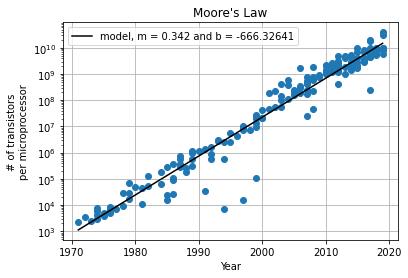

In [80]:
#code here
import matplotlib
import matplotlib.pyplot as plt

# Create figure
fig, ax = plt.subplots()

y_data = log_transistor_count # data used for training
x_data = year # data used for training

x = np.arange(np.min(year),np.max(year)+1) # grid of points to make prediction
y = f(x,(m,b))# f(x) prediction of the model 

ax.semilogy(x_data, np.exp(y_data), linewidth=0, marker='o')  # real data
ax.semilogy(x,np.exp(y),color='k',label='model, m = %.3f and b = %.5f'%(m,b)) #model prediction f(year)

ax.set(title='Moore\'s Law')
ax.set_xlabel('Year')
ax.set_ylabel('# of transistors\nper microprocessor',fontsize=10)
ax.legend()
ax.grid()
